## COMP 406 : Final Project
### Jesus Cantu Jr. 

## Project Aim
The purpose of this project is to begin exploring the data on IMDb (https://www.imdb.com/) and some of the associations that may exist between the various variables available. The hope is to take the findings from this report into consideration when creating a recommender system for TV shows/movies or revenue prediction models using IMDb data. 


# IMDb Datasets

IMDb (an acronym for Internet Movie Database)is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of March 2022, the database contained some 10.1 million titles (including television episodes) and 11.5 million person records.

Subsets of IMDb data are available for access to customers for personal and non-commercial use. The dataset files can be accessed and downloaded from https://www.imdb.com/interfaces/. The data is refreshed daily.

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:
  1) title.akas.tsv.gz 
  2) title.basics.tsv.gz 
  3) title.crew.tsv.gz
  4) title.episode.tsv.gz
  5) title.principals.tsv.gz
  6) title.ratings.tsv.gz  
  7) name.basics.tsv.gz. 

For this particulat project we will be analyzing data from: 

__title.basics.tsv.gz__ which contains the following information for titles:
 - tconst (string) - alphanumeric unique identifier of the title
 - titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
 - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
 - originalTitle (string) - original title, in the original language
 - isAdult (boolean) - 0: non-adult title; 1: adult title
 - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
 - endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
 - runtimeMinutes – primary runtime of the title, in minutes
 - genres (string array) – includes up to three genres associated with the title

__title.ratings.tsv.gz__ which contains the IMDb rating and votes information for titles: 
  - tconst (string) - alphanumeric unique identifier of the title
  - averageRating – weighted average of all the individual user ratings
  - numVotes - number of votes the title has received

__title.episode.tsv.gz__  which contains the tv episode information. Fields include:
 - tconst (string) - alphanumeric identifier of episode
 - parentTconst (string) - alphanumeric identifier of the parent TV Series
 - seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

# Data Wrangling

In [1]:
# Import required libraries 
import numpy as np 
import pandas as pd 

In [11]:
# Read IMDb datasets

basics_tsv_file = "/Users/jesuscantu/Desktop/COMP_406/Raw_Data/title.basics.tsv"
basics = pd.read_csv(basics_tsv_file, sep='\t',low_memory = False)
basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798553 entries, 0 to 9798552
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 672.8+ MB


In [13]:
ratings_tsv_file = "/Users/jesuscantu/Desktop/COMP_406/Raw_Data/title.ratings.tsv"
ratings = pd.read_csv(ratings_tsv_file, sep='\t',low_memory = False)
ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1964
1,tt0000002,5.8,263
2,tt0000003,6.5,1808
3,tt0000004,5.6,178
4,tt0000005,6.2,2606


In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304129 entries, 0 to 1304128
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1304129 non-null  object 
 1   averageRating  1304129 non-null  float64
 2   numVotes       1304129 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 29.8+ MB


In [15]:
episodes_tsv_file = "/Users/jesuscantu/Desktop/COMP_406/Raw_Data/title.episode.tsv"
episodes = pd.read_csv(episodes_tsv_file, sep='\t',low_memory = False)
episodes.head(5)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [17]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438416 entries, 0 to 7438415
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   parentTconst   object
 2   seasonNumber   object
 3   episodeNumber  object
dtypes: object(4)
memory usage: 227.0+ MB


In [47]:
# Merge IMDb Basics, Ratings & Episodes data sets by tconst

data_merged_basics_ratings = pd.merge(basics, ratings, on = "tconst")
data_merged_basics_ratings_episodes = pd.merge(data_merged_basics_ratings, episodes, on = "tconst")
print("IMDb data has been merged.")

IMDb data has been merged.


In [48]:
data_merged_basics_ratings.shape # This new dataset has ~1 million rows and 11 columns 

(1304129, 11)

In [49]:
data_merged_basics_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1964
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,263
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1808
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2606


In [50]:
data_merged_basics_ratings_episodes.shape #This new dataset has ~637K rows and 14 columns 

(637624, 14)

In [51]:
data_merged_basics_ratings_episodes.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,7.5,81,tt0041038,1,9
1,tt0043631,tvEpisode,The Life of King Henry V,The Life of King Henry V,0,1951,\N,133,Drama,6.8,11,tt0989125,2,16
2,tt0044093,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama,4.5,17,tt0959862,1,6
3,tt0045960,tvEpisode,King Lear,King Lear,0,1953,\N,75,"Drama,History,Music",6.9,183,tt0044284,2,3
4,tt0046150,tvEpisode,Othello,Othello,0,1953,\N,84,Drama,8.2,11,tt0341798,\N,\N


In [52]:
# Check for duplicate rows in merged data sets 
duplicate_rows = data_merged_basics_ratings[data_merged_basics_ratings.duplicated()]

if len(duplicate_rows) > 0:
    print(f'There are {len(duplicate_rows)} duplicate rows in the dataframe: data_merged_basics_ratings')
else:
    print('There are no duplicate rows in the dataframe: data_merged_basics_ratings')

print(" ")
duplicate_rows2 = data_merged_basics_ratings_episodes[data_merged_basics_ratings_episodes.duplicated()]

if len(duplicate_rows2) > 0:
    print(f'There are {len(duplicate_rows2)} duplicate rows in the dataframe: data_merged_basics_ratings_episodes')
else:
    print('There are no duplicate rows in the dataframe: data_merged_basics_ratings_episodes')

There are no duplicate rows in the dataframe: data_merged_basics_ratings
 
There are no duplicate rows in the dataframe: data_merged_basics_ratings_episodes


In [53]:
# Check for missing values in merged data sets 
missing_values = data_merged_basics_ratings.isnull().sum()

if missing_values.sum() > 0:
    print(f'The dataframe data_merged_basics_ratings has {missing_values.sum()} missing values')
    print(missing_values)
else:
    print('The dataframe data_merged_basics_ratings has no missing values')
    
print(" ")
missing_values2 = data_merged_basics_ratings_episodes.isnull().sum()

if missing_values2.sum() > 0:
    print(f'The dataframe data_merged_basics_ratings_episodes has {missing_values2.sum()} missing values')
    print(missing_values2)
else:
    print('The dataframe data_merged_basics_ratings_episodes has no missing values')

# Note, looking at the data it appears that some missing values might be coded as \N and thus might not be read as NaN
data_merged_basics_ratings = data_merged_basics_ratings.replace('\\N', np.nan) # replace all occurrences of '\\N' with NaN
data_merged_basics_ratings_episodes = data_merged_basics_ratings_episodes.replace('\\N', np.nan) # replace all occurrences of '\\N' with NaN

The dataframe data_merged_basics_ratings has 2 missing values
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
dtype: int64
 
The dataframe data_merged_basics_ratings_episodes has 2 missing values
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
parentTconst      0
seasonNumber      0
episodeNumber     0
dtype: int64


In [54]:
# Re-check for missing values in merged data set 
missing_values = data_merged_basics_ratings.isnull().sum()

if missing_values.sum() > 0:
    print(f'The dataframe data_merged_basics_ratings has {missing_values.sum()} missing values')
    print(missing_values)
else:
    print('The dataframe data_merged_basics_ratings has no missing values')
    
print(" ")
missing_values2 = data_merged_basics_ratings_episodes.isnull().sum()

if missing_values2.sum() > 0:
    print(f'The dataframe data_merged_basics_ratings_episodes has {missing_values2.sum()} missing values')
    print(missing_values2)
else:
    print('The dataframe data_merged_basics_ratings_episodes has no missing values')

The dataframe data_merged_basics_ratings has 1649437 missing values
tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear             258
endYear           1258832
runtimeMinutes     370670
genres              19677
averageRating           0
numVotes                0
dtype: int64
 
The dataframe data_merged_basics_ratings_episodes has 914464 missing values
tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear            144
endYear           637624
runtimeMinutes    245167
genres              1095
averageRating          0
numVotes               0
parentTconst           0
seasonNumber       15217
episodeNumber      15217
dtype: int64


In [55]:
# Save the merged dataframes to a CSV file for future use
# At this point, we will not remove any missing values 
path = '/Users/jesuscantu/Desktop/COMP_406/Processed_Data'

filename1 = 'IMDb_basic_ratings_data.csv'
filename2 = 'IMDb_basic_ratings_episodes_data.csv'

data_merged_basics_ratings.to_csv(f'{path}/{filename1}', index = False)
data_merged_basics_ratings_episodes.to_csv(f'{path}/{filename2}', index = False)

# print a message when done saving
print(f'The 1st file has been saved to: {path}/{filename1}')
print(f'The 2nd file has been saved to: {path}/{filename2}')

The 1st file has been saved to: /Users/jesuscantu/Desktop/COMP_406/Processed_Data/IMDb_basic_ratings_data.csv
The 2nd file has been saved to: /Users/jesuscantu/Desktop/COMP_406/Processed_Data/IMDb_basic_ratings_episodes_data.csv


# Exploratory Data Analysis 

We will begin our investigation by identifying the number of years included in the data set, as well as the different tile types and genres associated with all the titles in the data set. 

In [1]:
# Import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Load the merged dataframes 

# Basics & Ratings data for IMDb titles
IMDb_df = pd.read_csv("/Users/jesuscantu/Desktop/COMP_406/Processed_Data/IMDb_basic_ratings_data.csv", low_memory = False)

# Basics, Ratings & Episodes data for IMDb titles
IMDb_df2 = pd.read_csv("/Users/jesuscantu/Desktop/COMP_406/Processed_Data/IMDb_basic_ratings_episodes_data.csv", low_memory = False)

print("IMDb data has finished loading.")

IMDb data has finished loading.


In [3]:
# Clean the merged data sets 

# Remove any rows in IMDb_df where startYear, genres, and runtimeMinutes is NaN
IMDb_df = IMDb_df.dropna(subset=['startYear', 'genres', 'runtimeMinutes'])

# Remove any rows in IMDb_df2 where startYear, seasonNumber, and episodeNumber is NaN
IMDb_df2 = IMDb_df2.dropna(subset=['startYear', 'seasonNumber', 'episodeNumber'])

# Convert seasonNumber and episodeNumber to int
IMDb_df2 ['seasonNumber'] = IMDb_df2['seasonNumber'].astype(int)
IMDb_df2 ['episodeNumber'] = IMDb_df2['episodeNumber'].astype(int)

# Convert startYear & endYear to datetime
IMDb_df['startYear'] = pd.to_datetime(IMDb_df['startYear'], format='%Y', errors='coerce')
IMDb_df2['startYear'] = pd.to_datetime(IMDb_df2['startYear'], format='%Y', errors='coerce')

# Keep year only and convert to integer (to subset later based on year)
IMDb_df['startYear'] = IMDb_df['startYear'].dt.year.fillna(0).astype(int)
IMDb_df2['startYear'] = IMDb_df2['startYear'].dt.year.fillna(0).astype(int)

In [4]:
IMDb_df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short",5.7,1964
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short",5.8,263
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1808
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short",6.2,2606


In [5]:
IMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923886 entries, 0 to 1304128
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          923886 non-null  object 
 1   titleType       923886 non-null  object 
 2   primaryTitle    923886 non-null  object 
 3   originalTitle   923886 non-null  object 
 4   isAdult         923886 non-null  int64  
 5   startYear       923886 non-null  int64  
 6   endYear         29263 non-null   float64
 7   runtimeMinutes  923886 non-null  object 
 8   genres          923886 non-null  object 
 9   averageRating   923886 non-null  float64
 10  numVotes        923886 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 84.6+ MB


In [6]:
IMDb_df2.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9
1,tt0043631,tvEpisode,The Life of King Henry V,The Life of King Henry V,0,1951,NaN,133,Drama,6.8,11,tt0989125,2,16
2,tt0044093,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,NaN,60,Drama,4.5,17,tt0959862,1,6
3,tt0045960,tvEpisode,King Lear,King Lear,0,1953,NaN,75,"Drama,History,Music",6.9,183,tt0044284,2,3
5,tt0046855,tvEpisode,A Christmas Carol,A Christmas Carol,0,1954,NaN,60,"Adventure,Drama,Family",5.8,157,tt0046643,1,4


In [7]:
IMDb_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622266 entries, 0 to 637623
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          622266 non-null  object 
 1   titleType       622266 non-null  object 
 2   primaryTitle    622266 non-null  object 
 3   originalTitle   622266 non-null  object 
 4   isAdult         622266 non-null  int64  
 5   startYear       622266 non-null  int64  
 6   endYear         0 non-null       float64
 7   runtimeMinutes  387720 non-null  object 
 8   genres          621346 non-null  object 
 9   averageRating   622266 non-null  float64
 10  numVotes        622266 non-null  int64  
 11  parentTconst    622266 non-null  object 
 12  seasonNumber    622266 non-null  int64  
 13  episodeNumber   622266 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 71.2+ MB


In [69]:
# Get the number of unique years, title types, and genres in the IMDb dataset
num_years = IMDb_df['startYear'].nunique()
min_year = IMDb_df['startYear'].min()
max_year = IMDb_df['startYear'].max()

num_title_types = IMDb_df['titleType'].nunique()
num_genres = IMDb_df['genres'].nunique()

print("Number of unique years:", num_years)
print("Range of years:", min_year, "-", max_year)
print("Number of unique title types:", num_title_types)
print("Number of unique genres:", num_genres)

Number of unique years: 144
Range of years: 1874 - 2023
Number of unique title types: 10
Number of unique genres: 1950


In [70]:
# Check genres 
IMDb_df['genres'].value_counts().head(10) # displays counts for top 10 genres

Drama                         71721
Comedy                        69478
Documentary                   55343
Action,Adventure,Animation    29925
Drama,Short                   21926
Crime,Drama,Mystery           20633
Short                         20188
Reality-TV                    19895
Comedy,Drama                  19502
Drama,Romance                 18357
Name: genres, dtype: int64

Note, each title in the data set can be associated with at most three different genres!
We will move on to visualizing the number of titles played each year by title type and genre. 

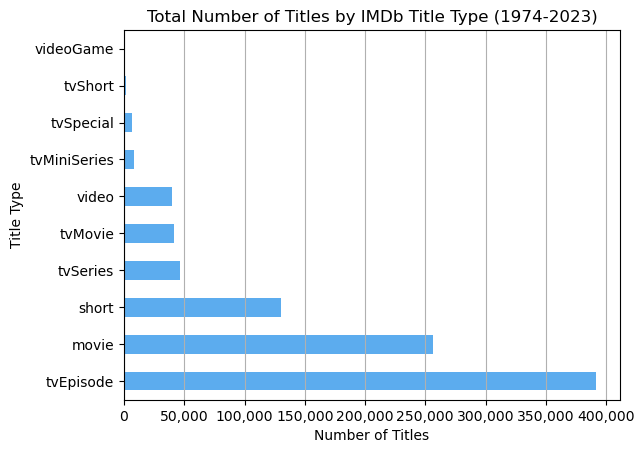

In [71]:
# Create a horizontal bar chart showing total number of titles by type across the full data set 
ax = IMDb_df['titleType'].value_counts().plot(kind = 'barh', color = '#5CACEE')

# Format the x-axis tick labels with commas
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Add axis labels and a title
plt.xlabel('Number of Titles')
plt.ylabel('Title Type')
plt.title('Total Number of Titles by IMDb Title Type (1974-2023)')

# Rotate the y-axis labels for better readability
plt.yticks(rotation = 0)

# Add a grid to make it easier to compare the different categories
plt.grid(axis = 'x')

# Show the plot
plt.show()


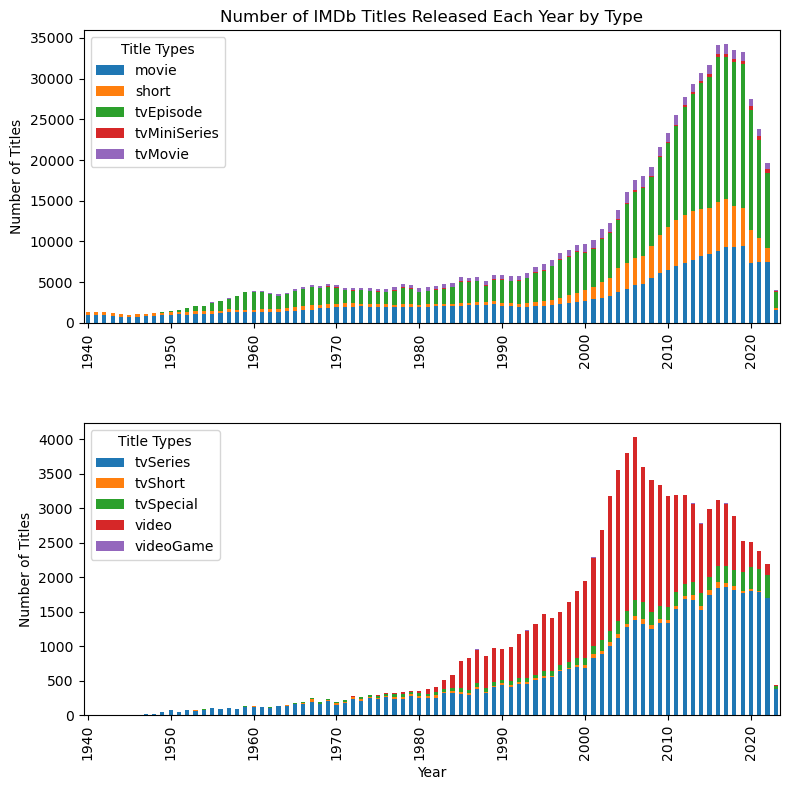

In [72]:
# Plot the counts of different titles by year and title type 

# Create a subset of the data with startYear >= 1940
IMDb_df_subset = IMDb_df[IMDb_df['startYear'] >= 1940] # Number of titles before 1940 is relatively small 

# Group the data by year and title type
grouped = IMDb_df_subset.groupby(['startYear', 'titleType'])

# Create a table of counts of different titles by year and title type
count_by_year_type = grouped['primaryTitle'].nunique().unstack()

# Split the count_by_year_type table into two separate tables
first_table = count_by_year_type[['movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie']]
second_table = count_by_year_type[['tvSeries', 'tvShort', 'tvSpecial', 'video', 'videoGame']]

# Plot the counts of different titles by year and title type
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 8))

first_table.plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_title('Number of IMDb Titles Released Each Year by Type')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Number of Titles')
axes[0].set_xticks(range(0, len(first_table.index), 10))
axes[0].set_xticklabels(first_table.index[::10])
legend = axes[0].legend(title = 'Title Types')
plt.setp(legend.get_title(), fontsize = 'medium')

second_table.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_title(' ')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Titles')
axes[1].set_xticks(range(0, len(second_table.index), 10))
axes[1].set_xticklabels(second_table.index[::10])
legend = axes[1].legend(title = 'Title Types')
plt.setp(legend.get_title(), fontsize = 'medium')

plt.tight_layout()
plt.show()

It seems the IMDb title types with the greatest number of titles released between 1974 and 2023 are TV episodes, followed by movies and short films. 

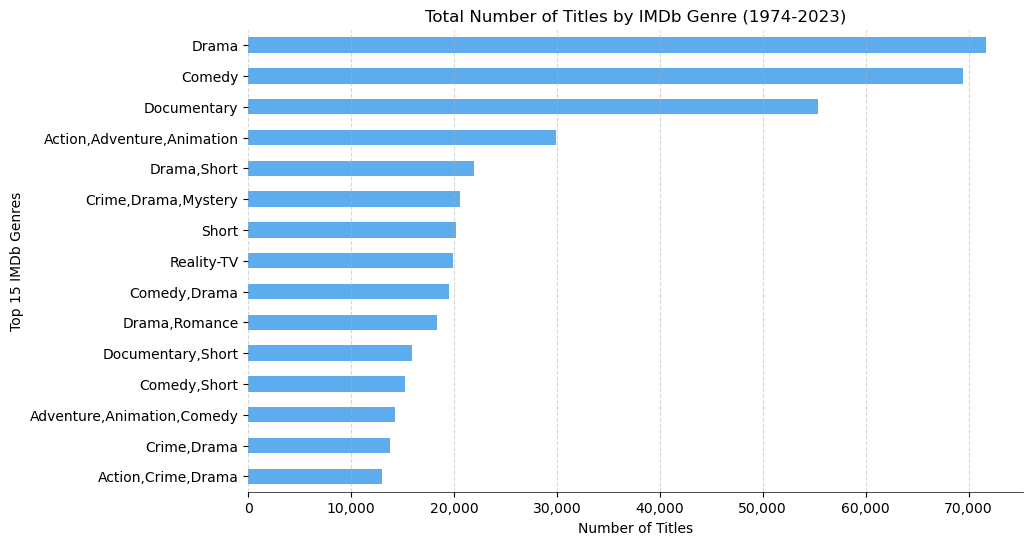

In [73]:
# Create a horizontal bar plot of the top 15 IMDb genres by number of titles
ax = IMDb_df['genres'].value_counts().head(15).sort_values().plot(kind='barh', figsize = (10, 6), color = '#5CACEE')

# Set plot title and axis labels
plt.title('Total Number of Titles by IMDb Genre (1974-2023)')
plt.xlabel('Number of Titles')
plt.ylabel('Top 15 IMDb Genres')

# Customize x-axis tick labels to show values as thousands
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Remove spines and add grid lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.grid(axis='x', linestyle = '--', alpha = 0.5)

# Show plot
plt.show()

It seems the IMDb genres with the highest total number of titles released between 1974 and 2023 are Drama, Comedy, and Documentary. 

In [74]:
# Find the top 5 genres based on averageRating and numVotes for each decade

# Create a new column 'decade' based on 'startYear' column
IMDb_df['decade'] = IMDb_df['startYear'] // 10 * 10

# Convert 'runtimeMinutes' column to float and replace missing values with NaN
IMDb_df['runtimeMinutes'] = IMDb_df['runtimeMinutes'].replace('\\N', np.nan).astype(float)

# Group the data by decade and genres
grouped = IMDb_df.groupby(['decade', 'genres'])

# Calculate the mean of 'averageRating' and 'numVotes' columns for each group
grouped_mean = round(grouped[['averageRating', 'numVotes']].mean(),2)

# Sort the data in descending order based on 'averageRating' and 'numVotes'
sorted_mean = grouped_mean.sort_values(['decade', 'averageRating', 'numVotes'], ascending = [True, False, False])

# Select the top 5 genres based on 'averageRating' and 'numVotes' for each decade
top_genres = {}
for decade in range(1910, 2030, 10):
    top_genres[str(decade) + 's'] = sorted_mean.loc[decade].nlargest(5, ['averageRating', 'numVotes'])
    top_genres[str(decade) + 's']['genres'] = top_genres[str(decade) + 's'].index.get_level_values('genres')
    top_genres[str(decade) + 's'].reset_index(drop = True, inplace = True)

# Print the results
for decade in top_genres.keys():
    print(decade)
    print(top_genres[decade])
    print("\n")


1910s
   averageRating  numVotes                    genres
0            8.2      11.0   Biography,Romance,Short
1            7.7    3028.0  Animation,Comedy,Fantasy
2            7.7    1891.0          Drama,Horror,War
3            7.6      14.0          Comedy,Drama,War
4            7.4      65.0    Animation,Comedy,Drama


1920s
   averageRating  numVotes                   genres
0            8.4   26396.0        Documentary,Music
1            8.1   21540.0   Action,Comedy,Thriller
2            8.1   10327.0   Drama,Thriller,Western
3            8.0    5453.5  Adventure,Drama,Fantasy
4            7.9   59288.0   Drama,History,Thriller


1930s
   averageRating  numVotes                    genres
0           8.00      10.0     Comedy,Short,Thriller
1           7.90     597.0   Adventure,Comedy,Horror
2           7.90      68.0  Comedy,Documentary,Drama
3           7.90      49.0                     Sport
4           7.75    4588.5         Documentary,Sport


1940s
   averageRating  numV

Lets dig in a little further into how titles have changed with time, particulary in regards to adult content. Across titles, is more adult or non-adult content created each year?



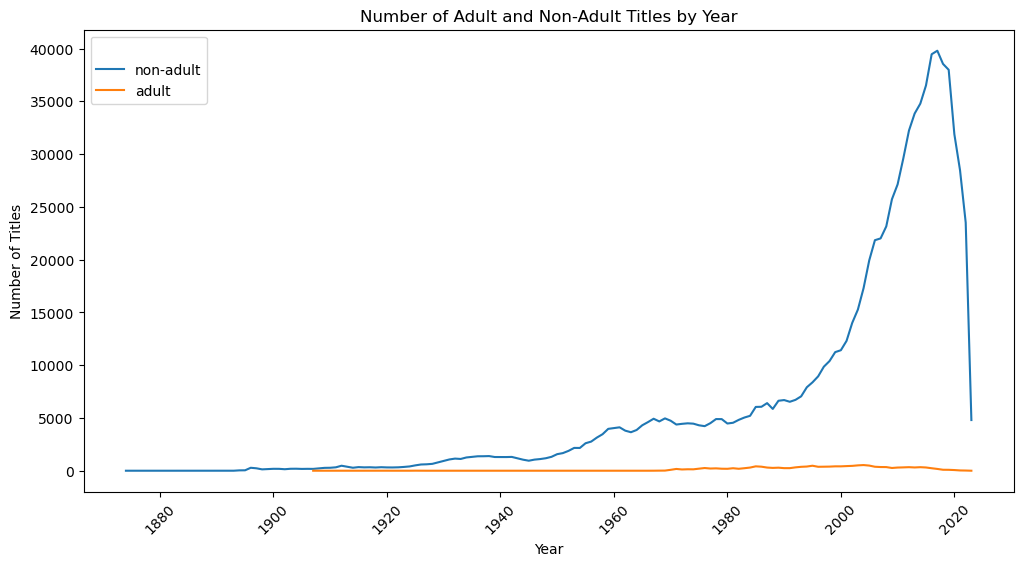

In [75]:
# Define a dictionary to map the binary values (isAdult) to categorical values
isAdult_map = {0: 'non-adult', 1: 'adult'}

# Use the map() function to recode the binary variable as a categorical variable
IMDb_df['isAdult_cat'] = IMDb_df['isAdult'].map(isAdult_map)

# Group the data by year and adult status
grouped = IMDb_df.groupby(['startYear', 'isAdult_cat'])

# Count the number of titles for each group
counted = grouped.size().reset_index(name = 'count')

# Plot the results
plt.figure(figsize=(12,6))
sns.lineplot(x = 'startYear', y = 'count', hue = 'isAdult_cat', data = counted)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Adult and Non-Adult Titles by Year')
plt.legend(title = ' ')
plt.show()

It seems more non-adult content is created each year. Notice, the sharp increase in non-adult content in the early 2000s and the significant drop in 2020, following the start of the COVID-19 pandemic. Lets look at runtime now, particularly for movies and TV episodes, and see how that has changed with time.  

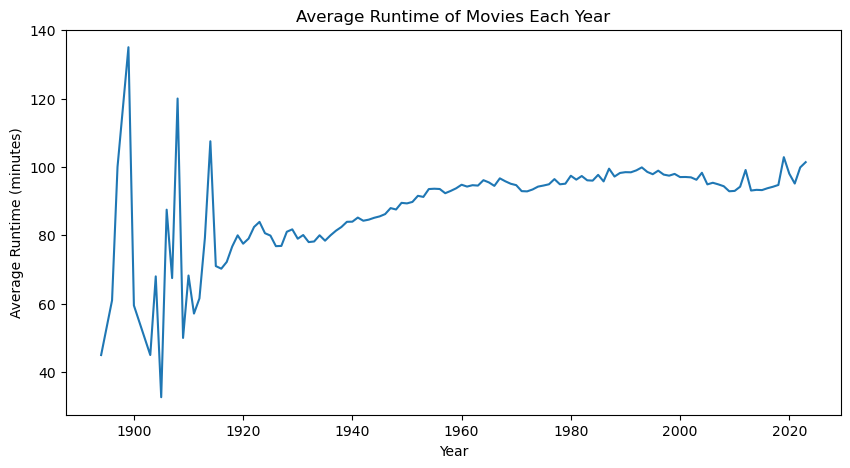

In [76]:
# Filter the data to only include movies
IMDb_movies = IMDb_df[IMDb_df['titleType'] == 'movie']

# Filter the data to only include titles with runtime information
IMDb_movies = IMDb_movies.dropna(subset=['runtimeMinutes'])

# Group the data by year and calculate the average runtime
runtime_by_year = IMDb_movies.groupby('startYear')['runtimeMinutes'].mean()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(runtime_by_year.index, runtime_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime of Movies Each Year')
plt.show()

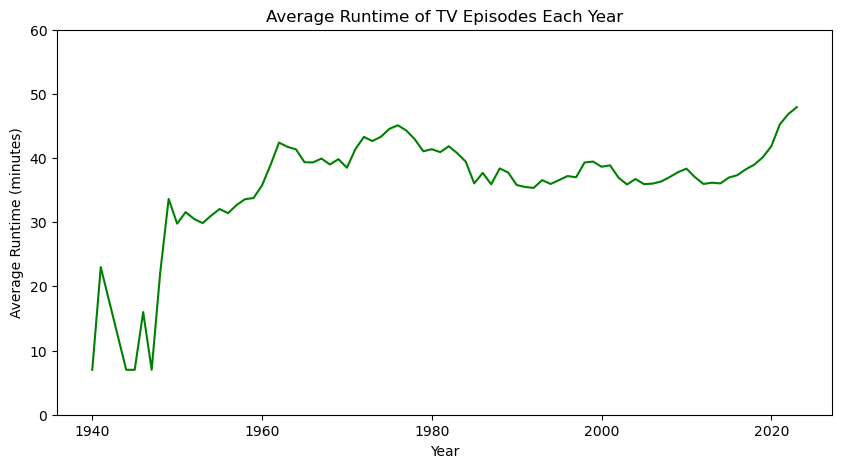

In [77]:
# Filter the data to only include tvEpisode
IMDb_tvEpisode = IMDb_df[IMDb_df['titleType'] == 'tvEpisode']

# Filter the data to only include titles with runtime information
IMDb_tvEpisode = IMDb_tvEpisode.dropna(subset=['runtimeMinutes'])

# Group the data by year and calculate the average runtime
runtime_by_year = IMDb_tvEpisode.groupby('startYear')['runtimeMinutes'].mean()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(runtime_by_year.index, runtime_by_year.values, color = 'green')
plt.ylim(0, 60)
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime of TV Episodes Each Year')
plt.show()

Averaging between 80-100 minutes, it seems the current runtime for movies has decreased by 20-40 minutes from that of the early 1900s. However, the average runtime for TV episodes has increased to be more than 30 minutes long. Has the new era of streaming services redefined the current runtime and lenght of TV series?

Lets dig a little deeper into viewer preferences and see what types of titles and genres have higher ratings among viewers. 

In [13]:
# Calculate the average number of episodes per season for all unique shows in the data set 

# Filter the data to only include tvEpisode
IMDb_tvEpisode = IMDb_df2[IMDb_df2['titleType'] == 'tvEpisode']

# Find the total number of episodes per season
episodes_per_season = IMDb_tvEpisode.groupby(['parentTconst', 'seasonNumber'])['episodeNumber'].max().reset_index(name='totalEpisodes')

# Count the total number of seasons for each show
season_counts = episodes_per_season.groupby(['parentTconst']).size().reset_index(name = 'totalSeasons')

# Calculate the average number of episodes per season for all unique shows
avg_episodes_per_season = episodes_per_season.groupby(['parentTconst'])['totalEpisodes'].mean().reset_index(name = 'avgEpisodesPerSeason')
avg_episodes_per_season['avgEpisodesPerSeason'] = avg_episodes_per_season['avgEpisodesPerSeason'].round(decimals = 0)

# Merge all the data frames together
merged_data = pd.merge(IMDb_tvEpisode, episodes_per_season, on = 'parentTconst', how = 'left')
merged_data = pd.merge(merged_data, season_counts, on = 'parentTconst', how = 'left')
merged_data = pd.merge(merged_data, avg_episodes_per_season, on='parentTconst', how = 'left')

merged_data.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber_x,episodeNumber,seasonNumber_y,totalEpisodes,totalSeasons,avgEpisodesPerSeason
0,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9,1,52,5,44.0
1,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9,2,26,5,44.0
2,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9,3,52,5,44.0
3,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9,4,52,5,44.0
4,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,NaN,30,Western,7.5,81,tt0041038,1,9,5,39,5,44.0


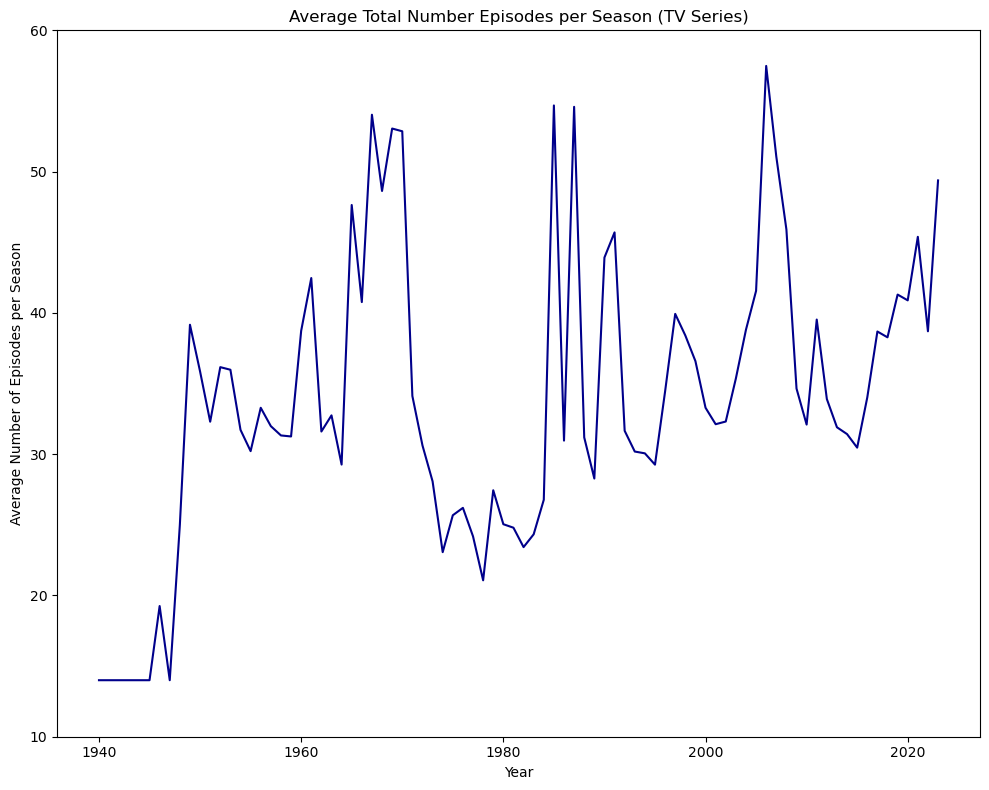

In [27]:
# Create a plot showing the average number of episodes per season for each year

# Plot the results in a line graph
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

# Average episodes per season per year
avg_episodes_per_season = merged_data.groupby('startYear')['avgEpisodesPerSeason'].mean()
ax.plot(avg_episodes_per_season.index, avg_episodes_per_season.values, color = 'darkblue')
ax.set_title('Average Total Number Episodes per Season (TV Series)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Episodes per Season')
ax.set_ylim([10,60])

plt.tight_layout()
plt.show()


This plot helps us visualize the trend of the average number of episodes per season for TV series over the years. By grouping the data by startYear and calculating the average number of episodes per season for each year, we can see if there is any change in the trend over time. The plot shows that the average number of episodes per season has decreased slightly from the early 2000s to the present day. 

In [ ]:
# Count the number of seasons for each show
season_counts = episodes_per_season.groupby(['parentTconst', 'startYear']).size().reset_index(name='seasonCount')

# Calculate the average number of episodes per season for all unique shows
avg_episodes_per_season = episodes_per_season.groupby(['parentTconst', 'startYear'])['episodeNumber'].mean().reset_index(name='avgEpisodesPerSeason')

# Visualize the results in a line plot
plt.plot(avg_episodes_per_show.index, avg_episodes_per_show.values)
plt.title('Average Number of Episodes per Season for Unique Shows (All Years)')
plt.xlabel('Show')
plt.ylabel('Average Number of Episodes')
plt.show()

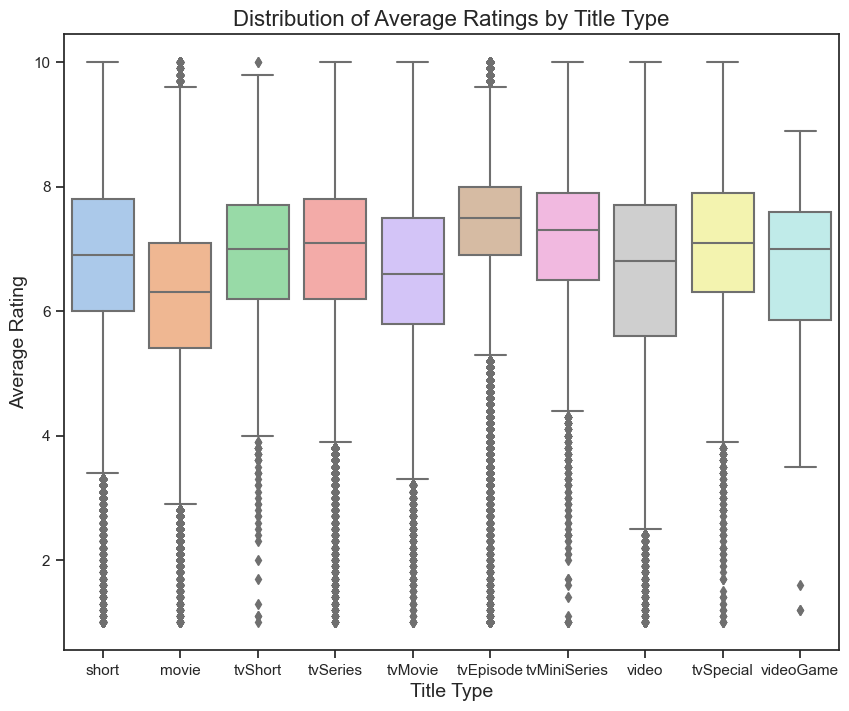

The three title types with the highest average rating are:

1. tvEpisode (avg rating = 7.40)
2. tvMiniSeries (avg rating = 7.14)
3. tvSpecial (avg rating = 6.97)


In [78]:
# Create a boxplot that displays the distribution of average ratings by title type 

# Calculate the average rating by title type
avg_ratings_by_title_type = IMDb_df.groupby('titleType')['averageRating'].mean().sort_values(ascending=False)

# Set the style and color palette
sns.set(style="ticks", palette="pastel")

# Create the boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x="titleType", y="averageRating", data=IMDb_df, palette="pastel")

# Add labels and title
plt.xlabel('Title Type', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Distribution of Average Ratings by Title Type', fontsize=16)

# Show the plot
plt.show()

# Print the three title types with the highest average rating
print("The three title types with the highest average rating are:\n")
for i, title_type in enumerate(avg_ratings_by_title_type.index[:3]):
    print("{}. {} (avg rating = {:.2f})".format(i+1, title_type, avg_ratings_by_title_type[title_type]))



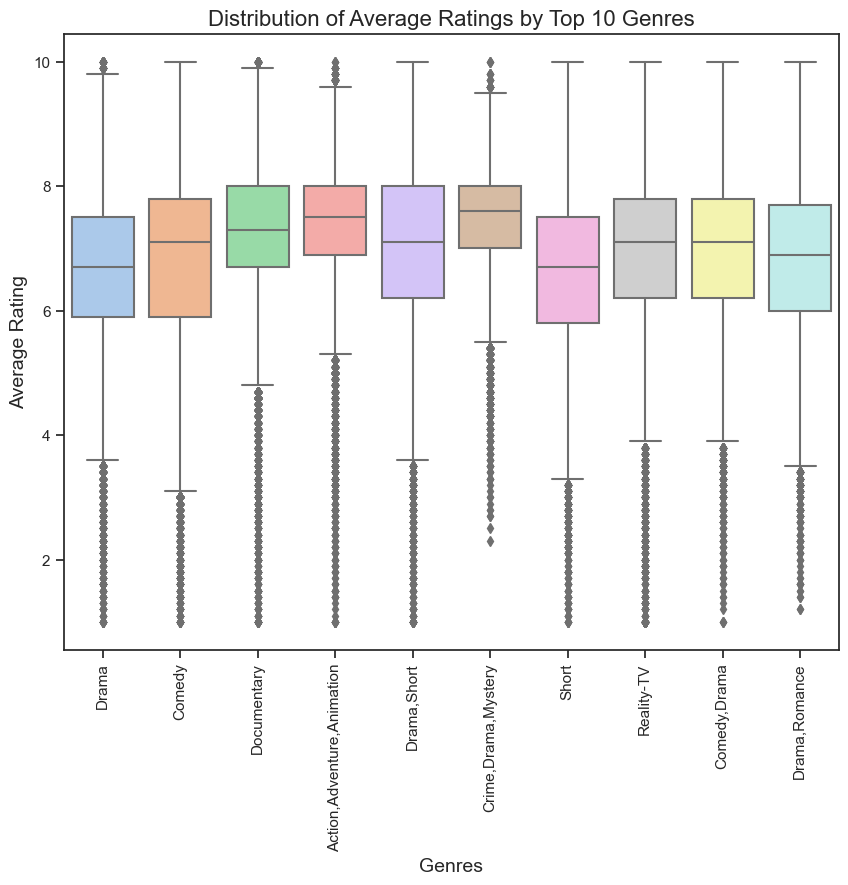

The top three genres by average rating are:

1. Crime,Drama,Mystery (avg rating = 7.40)
2. Action,Adventure,Animation (avg rating = 7.39)
3. Documentary (avg rating = 7.25)


In [79]:
# Create a boxplot that displays the distribution of average ratings by genre (top 10)

# Get the top 10 genres by number of titles
top_genres = IMDb_df['genres'].value_counts().head(10).index.tolist()

# Create a subset DataFrame with only the top 10 genres
top_genres_df = IMDb_df[IMDb_df['genres'].isin(top_genres)]

# Calculate the average rating for each genre
avg_ratings_by_genre = top_genres_df.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

# Set the style and color palette
sns.set(style = "ticks", palette = "pastel")

# Create the boxplot
plt.figure(figsize = (10,8))
sns.boxplot(x = "genres", y = "averageRating", data = top_genres_df, order = IMDb_df['genres'].value_counts().index[:10], palette = "pastel")

# Rotate x-axis labels
plt.xticks(rotation = 90)

# Add labels and title
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('Average Rating', fontsize = 14)
plt.title('Distribution of Average Ratings by Top 10 Genres', fontsize = 16)

# Show the plot
plt.show()

# Print the top three genres by average rating
print("The top three genres by average rating are:\n")
for i, genre in enumerate(avg_ratings_by_genre.index[:3]):
    print("{}. {} (avg rating = {:.2f})".format(i+1, genre, avg_ratings_by_genre[genre]))


Now, lets find the highest rated movie each year in the 2000s.

In [80]:
# Find the highest rated movie each year in the 2000s based on average ratings

# Subset the data to only include movies from the 2000s
movies_2000s = IMDb_df[(IMDb_df['startYear'] >= 2000) & (IMDb_df['titleType'] == 'movie')]

# Group the subset by year using the 'startYear' column
grouped = movies_2000s.groupby('startYear')

# For each year group, find the movie with the highest 'averageRating'
highest_rated = []
for year, group in grouped:
    highest_rated.append(group.loc[group['averageRating'].idxmax()])

# Select the relevant columns and display the result
result = pd.DataFrame(highest_rated, columns=['startYear', 'primaryTitle', 'averageRating', 'numVotes'])
result.head(24)


,startYear,primaryTitle,averageRating,numVotes
141368,2000,Long Sleepless Nights,9.7,10
165145,2001,Faber,9.8,9
397417,2002,Desh Devi,9.8,11
217778,2003,Don: Plain & Tall,9.9,246
239847,2004,Alex,9.7,7
1015374,2005,Efunsetan Aniwura,10.0,6
1076170,2006,Long Road Home,9.9,12
496642,2007,Petersburg's tram,10.0,27
653406,2008,Hearing Everett: The Rancho Sordo Mudo Story,9.8,6
803576,2009,Max Ernst Hanging,10.0,7


As well as the the highest rated TV series each year in the 2000s.

In [81]:
# Find the highest rated tvSeries each year in the 2000s based on average ratings

# Subset the data to only include movies from the 2000s
movies_2000s = IMDb_df[(IMDb_df['startYear'] >= 2000) & (IMDb_df['titleType'] == 'tvSeries')]

# Group the subset by year using the 'startYear' column
grouped = movies_2000s.groupby('startYear')

# For each year group, find the movie with the highest 'averageRating'
highest_rated = []
for year, group in grouped:
    highest_rated.append(group.loc[group['averageRating'].idxmax()])

# Select the relevant columns and display the result
result = pd.DataFrame(highest_rated, columns=['startYear', 'primaryTitle', 'averageRating', 'numVotes'])
result.head(24)

,startYear,primaryTitle,averageRating,numVotes
728554,2000,Nas Garras da Patrulha,9.4,57
1095638,2001,Amrutham,9.6,775
225477,2002,Fashiontrance,9.9,14
832981,2003,Mundo da Leitura,10.0,11
570420,2004,Offside,9.7,7
953329,2005,Khawatir,9.5,3218
397888,2006,My Two Cents,9.6,17
1241142,2007,I stin Alpha i sti Vita oloi pan gia ti marmita,9.6,1129
899049,2008,Coke Studio,9.6,1250
718980,2009,Siubhlachan,9.5,7


# Data Modeling

Linear regression can help us understand the relationship between two variables, such as average rating and runtime, by identifying if there is a significant linear relationship between them. A linear regression model will estimate the slope and intercept of the linear relationship between the two variables; we can use this information to predict the value of one variable based on the other.


In [31]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [32]:
IMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923886 entries, 0 to 1304128
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   tconst          923886 non-null  object  
 1   titleType       923886 non-null  object  
 2   primaryTitle    923886 non-null  object  
 3   originalTitle   923886 non-null  object  
 4   isAdult         923886 non-null  int64   
 5   startYear       923886 non-null  int64   
 6   endYear         29263 non-null   float64 
 7   runtimeMinutes  923886 non-null  float64 
 8   genres          923886 non-null  category
 9   averageRating   923886 non-null  int64   
 10  numVotes        923886 non-null  int64   
 11  decade          923886 non-null  int64   
 12  isAdult_cat     923886 non-null  object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 93.5+ MB


In [33]:
# Adjust variable types for regression analysis

# Convert genres to categorical
IMDb_df['genres'] = IMDb_df['genres'].astype('category')

# Convert averageRating to integer
IMDb_df['averageRating'] = IMDb_df['averageRating'].astype(int)


In [34]:
IMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923886 entries, 0 to 1304128
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   tconst          923886 non-null  object  
 1   titleType       923886 non-null  object  
 2   primaryTitle    923886 non-null  object  
 3   originalTitle   923886 non-null  object  
 4   isAdult         923886 non-null  int64   
 5   startYear       923886 non-null  int64   
 6   endYear         29263 non-null   float64 
 7   runtimeMinutes  923886 non-null  float64 
 8   genres          923886 non-null  category
 9   averageRating   923886 non-null  int64   
 10  numVotes        923886 non-null  int64   
 11  decade          923886 non-null  int64   
 12  isAdult_cat     923886 non-null  object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 93.5+ MB


In [35]:
# Perform linear regression analysis to explore the relationship 
# between the average rating of titles and their runtime

# Split the dataset into training and testing sets
X = IMDb_df['runtimeMinutes'].values.reshape(-1, 1)
y = IMDb_df['averageRating'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

# Run Linear Regression

# Train the model
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict the test set results
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", round(mse, 2))
print("Linear Regression R^2 Score: ", round(r2, 2))

Linear Regression Mean Squared Error:  1.86
Linear Regression R^2 Score:  0.0


The MSE represents the average squared difference between the predicted ratings and the actual ratings. A lower value indicates better accuracy. The R-squared score represents the proportion of variance in the data that is explained by the model. A score of 1 indicates a perfect fit, while a score of 0 indicates that the model does not explain any of the variability in the data.

The linear regression model used above shows a mean squared error of 1.86, which means that the average squared difference between the predicted and actual average ratings is 1.86. The R^2 score of 0.0 indicates that the model does not fit the data well and does not explain much of the variance in the data. Therefore, the relationship between average rating and runtime is weak. We cannot be accurately predicted using a linear regression model with only runtime as the predictor variable.

In [36]:
# Perform linear regression analysis to explore the relationship 
# between the average rating of titles and their runtime and genre

# Create the OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the genres column and transform it
X_genres = encoder.fit_transform(IMDb_df['genres'].str.split(',', expand = True).fillna(''))

# Split the dataset into training and testing sets
X = np.hstack((IMDb_df['runtimeMinutes'].values.reshape(-1, 1), X_genres.toarray()))
y = IMDb_df['averageRating'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Run Linear Regression

# Train the model
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict the test set results
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", round(mse, 2))
print("Linear Regression R^2 Score: ", round(r2, 2))


Linear Regression Mean Squared Error:  1.71
Linear Regression R^2 Score:  0.08


The Linear Regression Mean Squared Error of 1.71 indicates that the average difference between the predicted values and actual values is 1.71 units, which is relatively low. 

The R^2 Score of 0.08 indicates that the model explains only 8% of the variance in the target variable. This is a relatively low value, which suggests that the model is not very accurate in predicting the average rating based on the runtime and genre. It is likely that there are other important factors for predicting average rating of titles that are not included in the model.

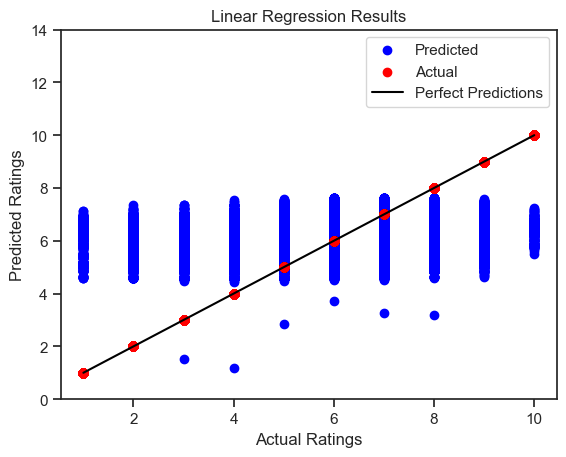

In [37]:
# Visualize the results

plt.scatter(y_test, y_pred, color = 'blue', label = 'Predicted')
plt.scatter(y_test, y_test, color = 'red', label = 'Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label = 'Perfect Predictions')
plt.ylim(0, 14)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

# Note, can do anything to better capture what appears to be a nonlinear pattern?

A polynomial regression may be better than a linear regression in our case because it allows us to model a nonlinear relationship between the average rating and runtime of titles. In other words, while a linear regression assumes a linear relationship between the two variables, a polynomial regression allows us to fit a curve to the data that better captures any nonlinear patterns.

In this case, we are using polynomial regression of degree 3, which means we are fitting a cubic curve to the data. This may be a good choice because it can capture some of the curvature that we may see in the relationship between average rating and runtime.

However, it's important to note that while a polynomial regression can fit a more complex curve to the data, it can also be prone to overfitting if the degree is too high. Therefore, it's important to strike a balance between fitting the curve well to the data and avoiding overfitting.

In [40]:
# Perform polynomial regression analysis to explore the relationship 
# between the average rating of titles and their runtime

# Split the dataset into training and testing sets
X = IMDb_df[['runtimeMinutes']]
y = IMDb_df['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run Polynomial Regression

# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

# Fit linear regression model
lin_reg = LinearRegression().fit(X_poly, y_train)

# Predict the test set results
y_pred = lin_reg.predict(poly.transform(X_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Mean Squared Error:", round(mse, 2))
print("Polynomial Regression R^2 Score: ", round(r2, 2))


Polynomial Regression Mean Squared Error: 1.86
Polynomial Regression R^2 Score:  0.0


The polynomial regression model in this case has a mean squared error (MSE) of 1.86, which is higher than the linear regression model's MSE of 1.71. This indicates that the polynomial model is less accurate than the linear model in predicting the average rating of titles based on their runtime.

However, the polynomial regression model's R-squared (R2) score of 0.0 indicates that the model does not fit the data well. We could play around with the degree to see if a different curvature fits the data better. Overall, the polynomial regression model does not perform well in predicting the average rating of titles based on their runtime in this dataset, and trying a different model might be a better choice.

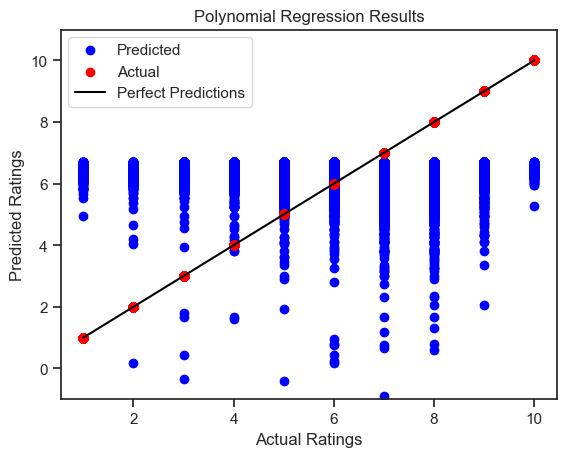

In [41]:
# Visualize the results

plt.scatter(y_test, y_pred, color = 'blue', label = 'Predicted')
plt.scatter(y_test, y_test, color = 'red', label = 'Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label = 'Perfect Predictions')
plt.ylim(-1, 11)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Polynomial Regression Results')
plt.legend()
plt.show()

A random forest model could potentially be appropriate for this problem. Random forest is a powerful machine learning algorithm that can handle non-linear relationships between the features and the target variable. It can capture interactions between the features and handle non-linearities that a linear regression model may not be able to capture.

In [43]:
# Random Forest model

# Train the model
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)

# Predict the test set results
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", round(mse, 2))
print("Random Forest R^2 Score: ", round(r2, 2))


Random Forest Mean Squared Error: 1.61
Random Forest R^2 Score:  0.14


The Random Forest model has a Mean Squared Error of 1.61, which means that on average, the predicted ratings are off by 1.61 units compared to the actual ratings. The R^2 score of 0.14 indicates that the model explains only 14% of the variability in the data. While this is better than the results obtained from linear and polynomial regression, the model still does not have a strong predictive power.

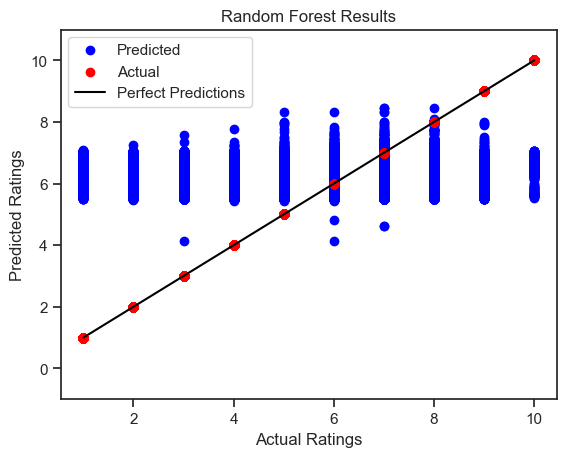

In [44]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label='Perfect Predictions')
plt.ylim(-1, 11)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Results')
plt.legend()
plt.show()

Moving forward, it would be a good idea to incorporate more data, from the other available IMDb data sets, and test out other variables that might be better predictors of a title's average rating than runtime. Obtaining the data directly from the IMDb API is also recommended as this will result in a more comprehensive and customizable list of attributes per title. 